In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the dataset
df = pd.read_csv('dh_etas.csv')


In [3]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_couriers,total_busy_couriers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-01-21 17:02:39,2015-01-21 18:01:30,5919,american,1.0,3,950,3,350,900,3.0,2.0,1.0,446,628.0
1,1.0,2015-02-12 23:47:42,2015-02-13 00:13:52,3954,vietnamese,3.0,2,1800,2,600,650,4.0,3.0,2.0,446,167.0
2,1.0,2015-02-12 23:52:34,2015-02-13 00:23:19,5654,sandwich,5.0,1,1295,1,1295,1295,6.0,2.0,1.0,251,586.0
3,1.0,2015-02-12 23:52:36,2015-02-13 00:38:47,5560,japanese,3.0,1,2802,1,2387,2398,12.0,16.0,27.0,251,1058.0
4,1.0,2015-02-12 23:35:28,2015-02-13 00:29:22,2406,cafe,4.0,6,7160,4,795,1590,10.0,10.0,10.0,446,536.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153950 entries, 0 to 153949
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     153190 non-null  float64
 1   created_at                                    153950 non-null  object 
 2   actual_delivery_time                          153946 non-null  object 
 3   store_id                                      153950 non-null  int64  
 4   store_primary_category                        150223 non-null  object 
 5   order_protocol                                153178 non-null  float64
 6   total_items                                   153950 non-null  int64  
 7   subtotal                                      153950 non-null  int64  
 8   num_distinct_items                            153950 non-null  int64  
 9   min_item_price                                15

In [5]:
df.isnull().sum()

market_id                                         760
created_at                                          0
actual_delivery_time                                4
store_id                                            0
store_primary_category                           3727
order_protocol                                    772
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_couriers                          12133
total_busy_couriers                             12133
total_outstanding_orders                        12133
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      518
dtype: int64

In [6]:
df.dtypes

market_id                                       float64
created_at                                       object
actual_delivery_time                             object
store_id                                          int64
store_primary_category                           object
order_protocol                                  float64
total_items                                       int64
subtotal                                          int64
num_distinct_items                                int64
min_item_price                                    int64
max_item_price                                    int64
total_onshift_couriers                          float64
total_busy_couriers                             float64
total_outstanding_orders                        float64
estimated_order_place_duration                    int64
estimated_store_to_consumer_driving_duration    float64
dtype: object

In [7]:
# 1. Load data
df = pd.read_csv('dh_etas.csv')

# 2. Check missing values
print("Missing Values:")
print(df.isnull().sum())
print("\nMissing Values Percentage:")
print((df.isnull().sum() / len(df) * 100).round(2))

# 3. Handle missing values
# First, let's see the data types to handle missing values appropriately
print("\nData Types:")
print(df.dtypes)

# Handle missing values based on data type
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# For numeric columns: fill with median
for col in numeric_cols:
    if df[col].isnull().any():
        median_value = df[col].median()
        print(f"\nFilling {col} nulls with median: {median_value}")
        df[col] = df[col].fillna(median_value)

# For categorical columns: fill with mode
for col in categorical_cols:
    if df[col].isnull().any():
        mode_value = df[col].mode()[0]
        print(f"\nFilling {col} nulls with mode: {mode_value}")
        df[col] = df[col].fillna(mode_value)

# Verify no missing values remain
print("\nRemaining Missing Values:")
print(df.isnull().sum())

Missing Values:
market_id                                         760
created_at                                          0
actual_delivery_time                                4
store_id                                            0
store_primary_category                           3727
order_protocol                                    772
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_couriers                          12133
total_busy_couriers                             12133
total_outstanding_orders                        12133
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      518
dtype: int64

Missing Values Percentage:
market_id                                       0.49
created_at                

In [8]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')  # or simply remove this line if it still doesn't work

# For reproducibility
np.random.seed(42)

# Now let's check what styles are available (optional)
print("Available styles:")
print(plt.style.available)

# Load data
df = pd.read_csv('dh_etas.csv')

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())
print("\nMissing Values Percentage:")
print((df.isnull().sum() / len(df) * 100).round(2))

Available styles:
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']

Missing Values:
market_id                                         760
created_at                                          0
actual_delivery_time                                4
store_id                                            0
store_primary_category                           3727
order_protocol                                    772
total_items                                         0
subtotal                  

# Creating a Baseline Model Analysis

In [9]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# 2. Load and prepare data
df = pd.read_csv('dh_etas.csv')

# Convert timestamps and create target
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['delivery_duration'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()

# Remove rows where target is NaN (we can't predict these)
print("Shape before removing NaN targets:", df.shape)
df = df.dropna(subset=['delivery_duration'])
print("Shape after removing NaN targets:", df.shape)

# Handle missing values in features
print("\nMissing values before handling:")
print(df.isnull().sum())

# Market features (use mode for market_id as it's categorical despite being float)
df['market_id'] = df['market_id'].fillna(df['market_id'].mode()[0])

# Store features (use mode for categorical)
df['store_primary_category'] = df['store_primary_category'].fillna(df['store_primary_category'].mode()[0])
df['order_protocol'] = df['order_protocol'].fillna(df['order_protocol'].mode()[0])

# Courier features (these are related, so we should handle them together)
courier_cols = ['total_onshift_couriers', 'total_busy_couriers', 'total_outstanding_orders']
for col in courier_cols:
    df[col] = df[col].fillna(df.groupby('market_id')[col].transform('median'))
    df[col] = df[col].fillna(df[col].median())

# Driving duration (use median by market as distances might vary by city)
df['estimated_store_to_consumer_driving_duration'] = df['estimated_store_to_consumer_driving_duration'].fillna(
    df.groupby('market_id')['estimated_store_to_consumer_driving_duration'].transform('median')
)

print("\nMissing values after handling:")
print(df.isnull().sum())

# Sort by timestamp
df = df.sort_values('created_at')

# Select numeric features for baseline
numeric_features = ['market_id', 'total_items', 'subtotal', 'num_distinct_items', 
                   'min_item_price', 'max_item_price', 'total_onshift_couriers',
                   'total_busy_couriers', 'total_outstanding_orders',
                   'estimated_order_place_duration', 
                   'estimated_store_to_consumer_driving_duration']

X = df[numeric_features]
y = df['delivery_duration']

# Verify no NaN values in X and y
print("\nNaN values in features:", X.isnull().sum().sum())
print("NaN values in target:", y.isnull().sum())

# Split data chronologically (no shuffling)
train_size = 0.8
train_idx = int(len(df) * train_size)

X_train, X_test = X[:train_idx], X[train_idx:]
y_train, y_test = y[:train_idx], y[train_idx:]

print(f"\nTraining data time range: {df['created_at'].iloc[0]} to {df['created_at'].iloc[train_idx-1]}")
print(f"Testing data time range: {df['created_at'].iloc[train_idx]} to {df['created_at'].iloc[-1]}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Shape before removing NaN targets: (153950, 17)
Shape after removing NaN targets: (153946, 17)

Missing values before handling:
market_id                                         760
created_at                                          0
actual_delivery_time                                0
store_id                                            0
store_primary_category                           3727
order_protocol                                    772
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_couriers                          12133
total_busy_couriers                             12133
total_outstanding_orders                        12133
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      518
delivery

In [10]:
def create_baseline_model_comparison(X_train_scaled, X_test_scaled, y_train, y_test, numeric_features=None):
    """
    Creates and evaluates baseline models, then visualizes their performance.
    """
    # Define all models with hyperparameters
    models = {
        'Linear Regression': [LinearRegression()],
        'Ridge': [Ridge(alpha=a) for a in [0.1, 1.0, 10.0]],
        'Lasso': [Lasso(alpha=a) for a in [0.1, 1.0, 10.0]],
        'Random Forest': [RandomForestRegressor(n_estimators=n, random_state=42) 
                         for n in [50, 100, 200]],
        'Gradient Boosting': [GradientBoostingRegressor(n_estimators=n, random_state=42) 
                             for n in [50, 100, 200]],
        'XGBoost': [XGBRegressor(n_estimators=n, learning_rate=lr, max_depth=d, random_state=42) 
                   for n, lr, d in [(100, 0.1, 3), (100, 0.1, 5), (200, 0.05, 5)]]
    }
    
    # Train and evaluate all models
    results = {}
    xgb_fitted_models = {}
    
    for model_name, model_list in models.items():
        for model in model_list:
            # Create model name with hyperparameter info
            if len(model_list) > 1:
                if 'Ridge' in model_name or 'Lasso' in model_name:
                    name = f"{model_name} (α={model.alpha})"
                elif 'Random Forest' in model_name or 'Gradient Boosting' in model_name:
                    name = f"{model_name} (n={model.n_estimators})"
                elif 'XGBoost' in model_name:
                    name = f"{model_name} (n={model.n_estimators}, lr={model.learning_rate}, d={model.max_depth})"
            else:
                name = model_name
                
            # Fit and predict
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            mse = mean_squared_error(y_test, y_pred)
            results[name] = mse
            
            # Store XGBoost models for feature importance
            if 'XGBoost' in name:
                xgb_fitted_models[name] = model
    
    # Create results dataframe
    results_df = pd.DataFrame(list(results.items()), columns=['Model', 'MSE'])
    results_df['RMSE'] = np.sqrt(results_df['MSE'])
    results_df['RMSE_minutes'] = results_df['RMSE'] / 60
    results_df['MSE_normalized'] = -np.log10(results_df['MSE'])
    
    # Create visualizations
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 24))
    
    # 1. Normalized MSE heatmap
    normalized_data = results_df.pivot_table(index='Model', values='MSE_normalized', aggfunc='first')
    sns.heatmap(normalized_data, annot=True, cmap='RdYlGn', fmt='.2f', ax=ax1)
    ax1.set_title('Model Comparison - Normalized MSE (higher/greener is better)')
    
    # 2. RMSE heatmap (seconds)
    rmse_data = results_df.pivot_table(index='Model', values='RMSE', aggfunc='first')
    sns.heatmap(rmse_data, annot=True, cmap='RdYlGn_r', fmt='.2f', ax=ax2)
    ax2.set_title('Model Comparison - RMSE in seconds (lower is better)')
    
    # 3. RMSE heatmap (minutes)
    rmse_minutes_data = results_df.pivot_table(index='Model', values='RMSE_minutes', aggfunc='first')
    sns.heatmap(rmse_minutes_data, annot=True, cmap='RdYlGn_r', fmt='.2f', ax=ax3)
    ax3.set_title('Model Comparison - RMSE in minutes (lower is better)')
    
    plt.tight_layout()
    
    # Print performance summary
    print("\nModel Performance Summary (sorted from best to worst):")
    print("-" * 50)
    results_summary = results_df.sort_values('MSE')
    print(results_summary.round(2))
    
    # Calculate and print improvements over baseline
    baseline_rmse = results_df[results_df['Model'] == 'Linear Regression']['RMSE'].values[0]
    results_summary['Improvement_Over_Baseline_%'] = ((baseline_rmse - results_summary['RMSE']) / baseline_rmse * 100).round(2)
    print("\nImprovement Over Baseline (Linear Regression):")
    print("-" * 50)
    print(results_summary['Improvement_Over_Baseline_%'].sort_values(ascending=False))
    
    # Show feature importance for best XGBoost model
    best_model_name = min(results.items(), key=lambda x: x[1])[0]
    if 'XGBoost' in best_model_name and best_model_name in xgb_fitted_models:
        print(f"\nFeature Importance for {best_model_name}:")
        best_model = xgb_fitted_models[best_model_name]
        importance = pd.DataFrame({
            'feature': numeric_features,
            'importance': best_model.feature_importances_
        })
        print(importance.sort_values('importance', ascending=False))
    
    return results_df, xgb_fitted_models


Model Performance Summary (sorted from best to worst):
--------------------------------------------------
                            Model         MSE     RMSE  RMSE_minutes  \
12      Gradient Boosting (n=200)   905978.42   951.83         15.86   
13   XGBoost (n=100, lr=0.1, d=3)   906378.62   952.04         15.87   
11      Gradient Boosting (n=100)   909864.79   953.87         15.90   
15  XGBoost (n=200, lr=0.05, d=5)   926218.34   962.40         16.04   
10       Gradient Boosting (n=50)   929785.03   964.25         16.07   
6                  Lasso (α=10.0)   938824.34   968.93         16.15   
5                   Lasso (α=1.0)   941879.87   970.50         16.18   
4                   Lasso (α=0.1)   942366.44   970.76         16.18   
3                  Ridge (α=10.0)   942368.16   970.76         16.18   
2                   Ridge (α=1.0)   942410.23   970.78         16.18   
1                   Ridge (α=0.1)   942414.46   970.78         16.18   
0               Linear Regres

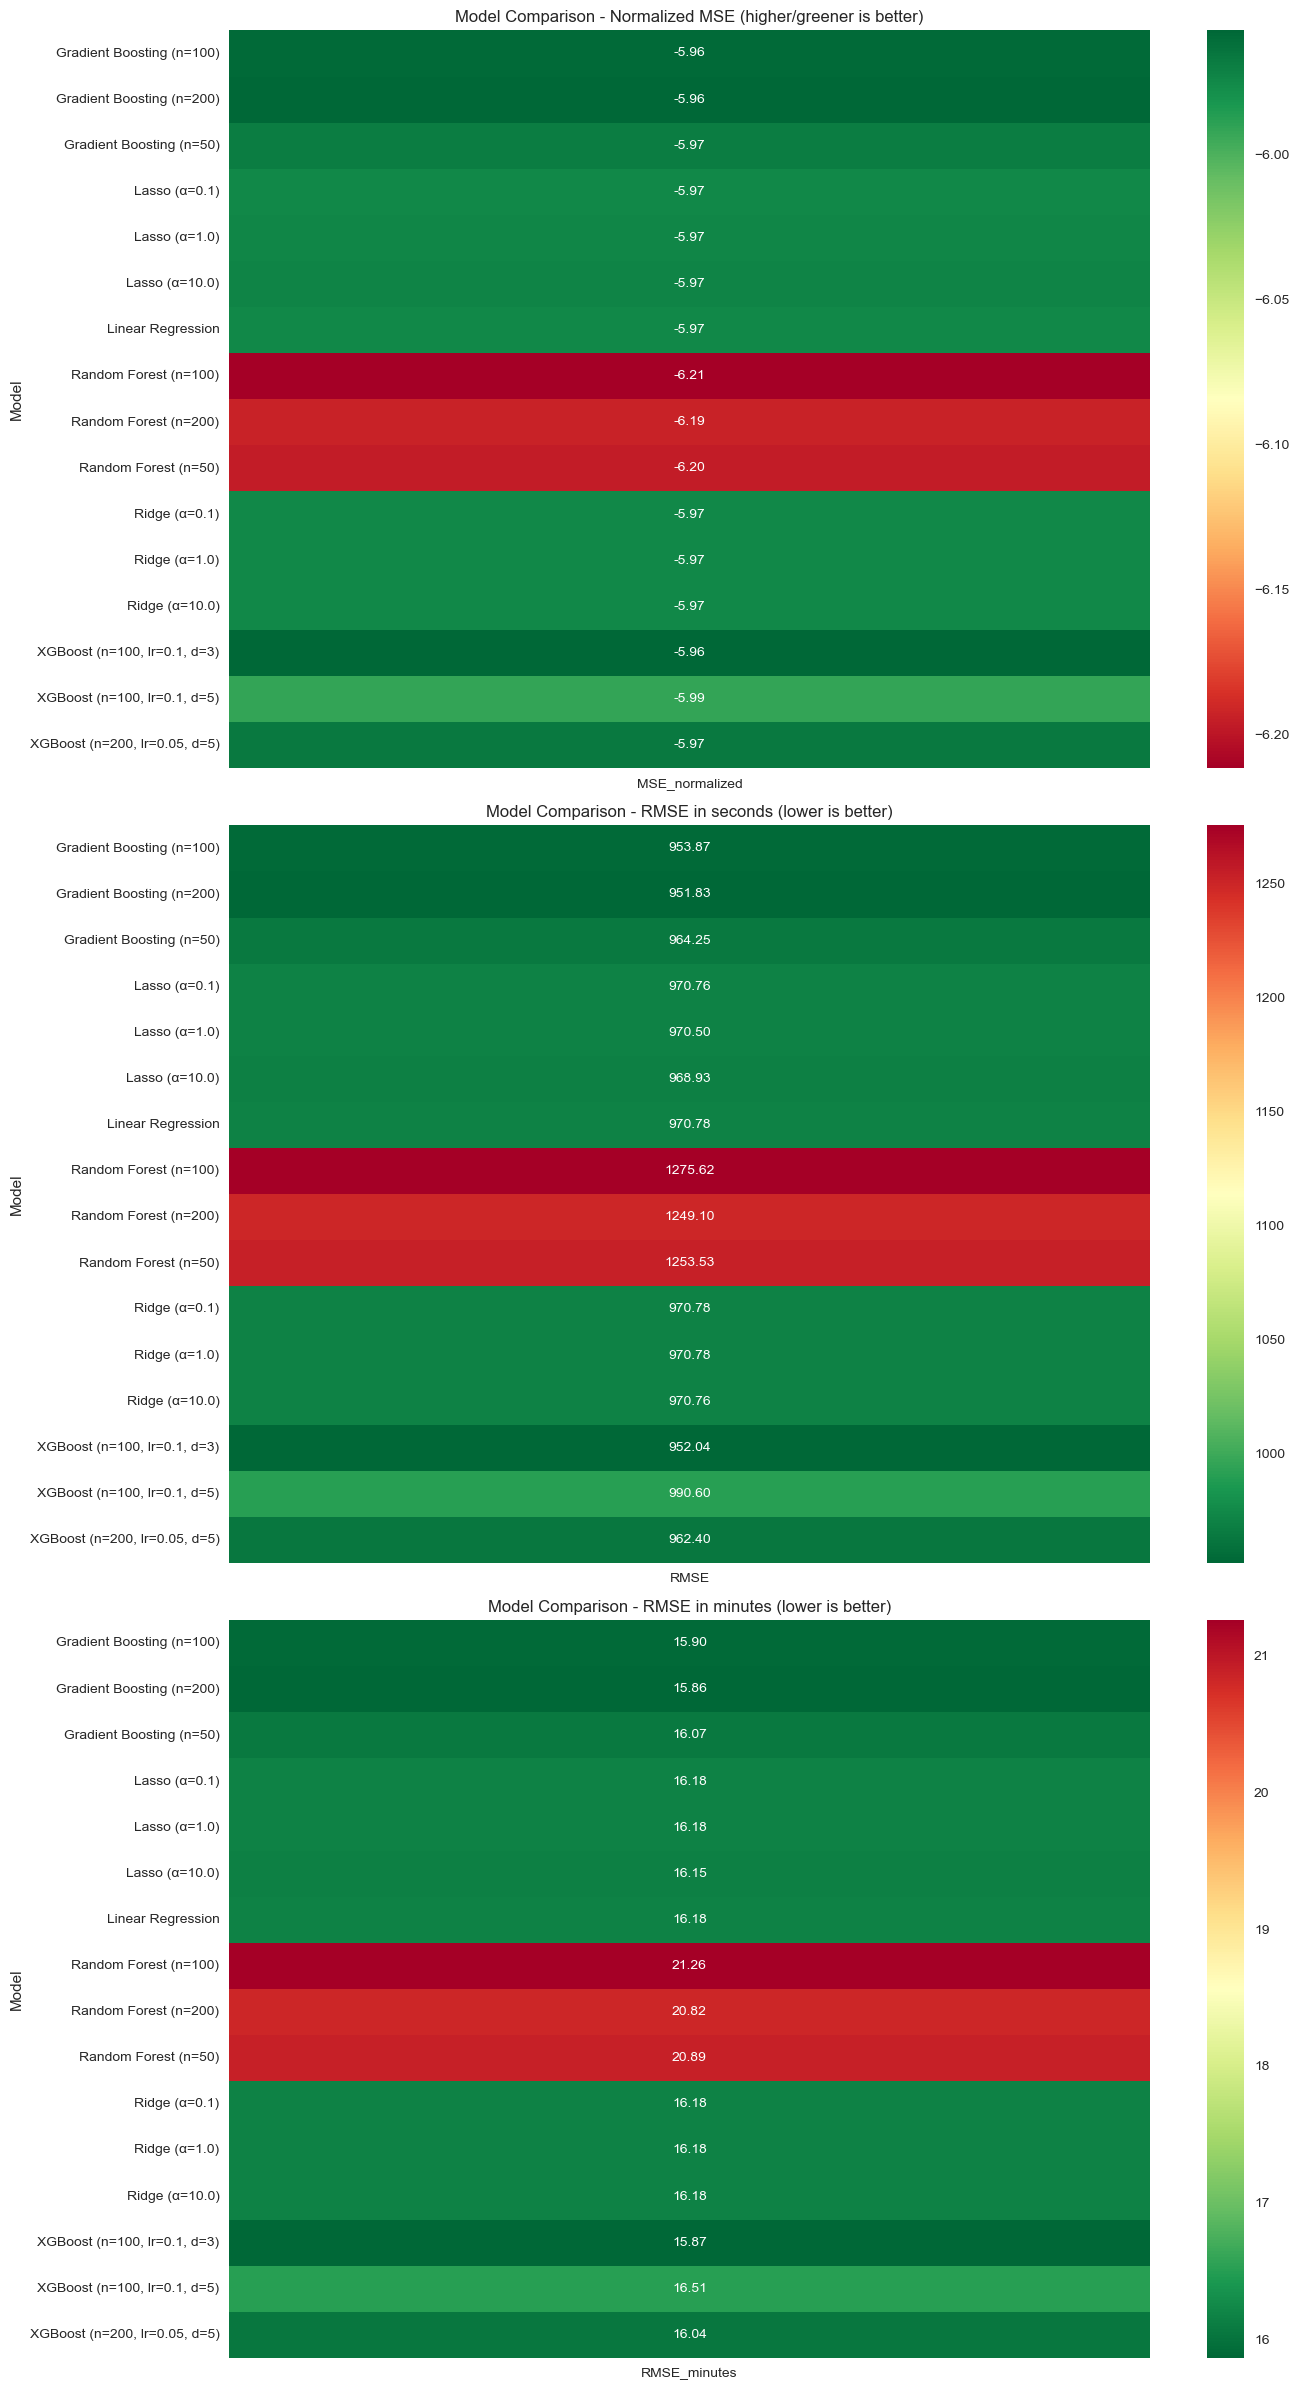

In [11]:
results_df, xgb_models = create_baseline_model_comparison(X_train_scaled, X_test_scaled, y_train, y_test, numeric_features)

# Beginning of Actual Attempt, done with Baseline

In [12]:
# Start fresh with original data
df = pd.read_csv('dh_etas.csv')

# Basic data exploration
print("Original Data Shape:", df.shape)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nMissing Values Percentage:")
print((df.isnull().sum() / len(df) * 100).round(2))

# Data types
print("\nData Types:")
print(df.dtypes)

# Basic statistics for numeric columns
print("\nNumeric Columns Statistics:")
print(df.describe())

# Unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns Unique Values:")
for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head())
    

Original Data Shape: (153950, 16)

Missing Values:
market_id                                         760
created_at                                          0
actual_delivery_time                                4
store_id                                            0
store_primary_category                           3727
order_protocol                                    772
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_couriers                          12133
total_busy_couriers                             12133
total_outstanding_orders                        12133
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      518
dtype: int64

Missing Values Percentage:
market_id                                   

### Removing negative values

In [13]:
# Check and handle negative values
print("Columns with negative values:")
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    neg_count = (df[col] < 0).sum()
    if neg_count > 0:
        print(f"{col}: {neg_count} negative values")

# Replace negative values with 0 for courier and order counts
courier_cols = ['total_onshift_couriers', 'total_busy_couriers', 'total_outstanding_orders']
for col in courier_cols:
    df[col] = df[col].clip(lower=0)

# Verify fix
print("\nAfter fixing negative values:")
for col in courier_cols:
    print(f"{col}: {(df[col] < 0).sum()} negative values")

Columns with negative values:
min_item_price: 11 negative values
total_onshift_couriers: 19 negative values
total_busy_couriers: 17 negative values
total_outstanding_orders: 36 negative values

After fixing negative values:
total_onshift_couriers: 0 negative values
total_busy_couriers: 0 negative values
total_outstanding_orders: 0 negative values


### Filling missing values and converting timestamps

In [14]:
# Convert timestamps
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

# Handle missing values by category:

# Market features (use mode for market_id as it's categorical despite being float)
df['market_id'] = df['market_id'].fillna(df['market_id'].mode()[0])

# Store features (use mode for categorical)
df['store_primary_category'] = df['store_primary_category'].fillna(df['store_primary_category'].mode()[0])
df['order_protocol'] = df['order_protocol'].fillna(df['order_protocol'].mode()[0])

# Courier features (these are related, so we should handle them together)
courier_cols = ['total_onshift_couriers', 'total_busy_couriers', 'total_outstanding_orders']
# Fill with median per market_id, then overall median
for col in courier_cols:
    df[col] = df[col].fillna(df.groupby('market_id')[col].transform('median'))
    df[col] = df[col].fillna(df[col].median())

# Driving duration (use median by market as distances might vary by city)
df['estimated_store_to_consumer_driving_duration'] = df['estimated_store_to_consumer_driving_duration'].fillna(
    df.groupby('market_id')['estimated_store_to_consumer_driving_duration'].transform('median')
)

# Verify no missing values remain
print("\nRemaining missing values:")
print(df.isnull().sum())

# Basic statistics after cleaning
print("\nBasic statistics after cleaning:")
print(df[courier_cols].describe())


Remaining missing values:
market_id                                       0
created_at                                      0
actual_delivery_time                            4
store_id                                        0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_couriers                          0
total_busy_couriers                             0
total_outstanding_orders                        0
estimated_order_place_duration                  0
estimated_store_to_consumer_driving_duration    0
dtype: int64

Basic statistics after cleaning:
       total_onshift_couriers  total_busy_couriers  total_outstanding_orders
count           153950.000000        153950.00000

### There are still missing values in the actual delivery time, let's handle them

In [16]:
# Handle missing delivery times
print("Rows with missing delivery times:")
missing_deliveries = df[df['actual_delivery_time'].isna()]
print(missing_deliveries[['created_at', 'actual_delivery_time', 'market_id', 'store_id']])

# First calculate delivery duration for non-missing rows
df['delivery_duration'] = np.where(
    df['actual_delivery_time'].notna(),
    (df['actual_delivery_time'] - df['created_at']).dt.total_seconds(),
    np.nan
)

# Calculate median delivery duration per market
market_medians = df.groupby('market_id')['delivery_duration'].median()
print("\nMarket median delivery durations (seconds):")
print(market_medians)

# Impute missing delivery times
for idx in missing_deliveries.index:
    market_id = df.loc[idx, 'market_id']
    median_duration = market_medians[market_id]
    
    # Calculate imputed delivery time
    created_time = df.loc[idx, 'created_at']
    df.loc[idx, 'actual_delivery_time'] = created_time + pd.Timedelta(seconds=median_duration)
    df.loc[idx, 'delivery_duration'] = median_duration

# Create flag for imputed values
df['is_imputed'] = False
df.loc[missing_deliveries.index, 'is_imputed'] = True

# Verify all missing values are handled
print("\nRemaining missing values after imputation:")
print(df.isnull().sum())

# Show basic statistics of delivery duration
print("\nDelivery Duration Statistics (in seconds):")
print(df['delivery_duration'].describe())
print("\nDelivery Duration Statistics (in minutes):")
print((df['delivery_duration']/60).describe())

print("\nNumber of imputed values:", df['is_imputed'].sum())

# Show statistics for each market including imputed values
print("\nMarket-wise statistics after imputation:")
market_stats = df.groupby('market_id').agg({
    'delivery_duration': ['count', 'mean', 'median'],
    'is_imputed': 'sum'
}).round(2)
print(market_stats)

Rows with missing delivery times:
                created_at actual_delivery_time  market_id  store_id
30911  2015-02-08 02:54:42                  NaT        2.0      2340
68928  2015-02-01 01:21:29                  NaT        2.0       314
77174  2015-02-10 21:51:54                  NaT        3.0      1698
138877 2015-02-01 01:36:33                  NaT        5.0      2651

Market median delivery durations (seconds):
market_id
1.0    2754.0
2.0    2579.0
3.0    2606.0
4.0    2636.0
5.0    2580.0
6.0    2610.5
Name: delivery_duration, dtype: float64

Remaining missing values after imputation:
market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_id                                        0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        

### Outliers seem to be present, let's handle them

Before outlier handling:
Total orders: 153950


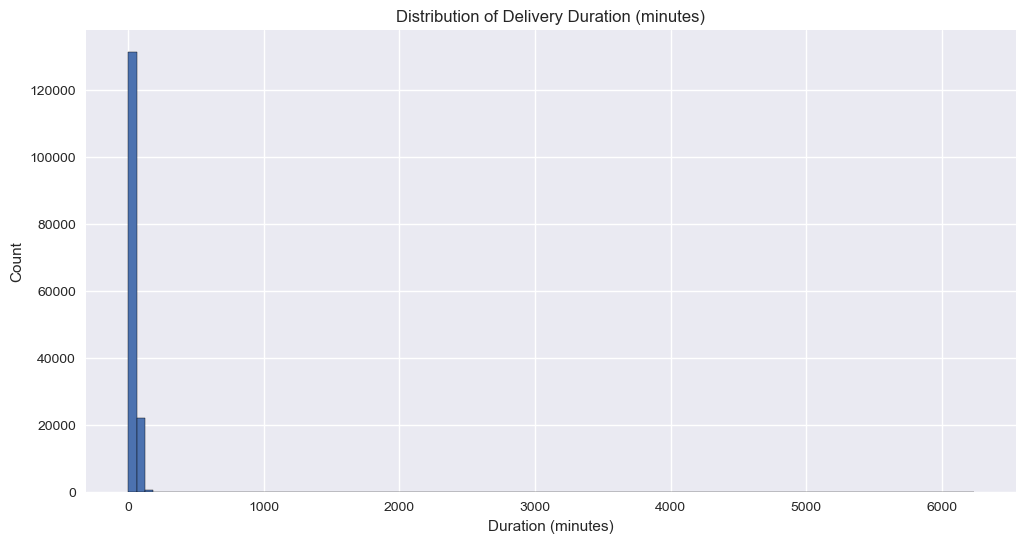


After outlier handling:
Total orders: 153837
Removed orders: 113

Delivery Duration Statistics After Cleaning (in minutes):
count    153837.000000
mean         47.013525
std          17.927804
min           5.350000
25%          34.666667
50%          43.800000
75%          55.616667
max         179.850000
Name: delivery_duration, dtype: float64


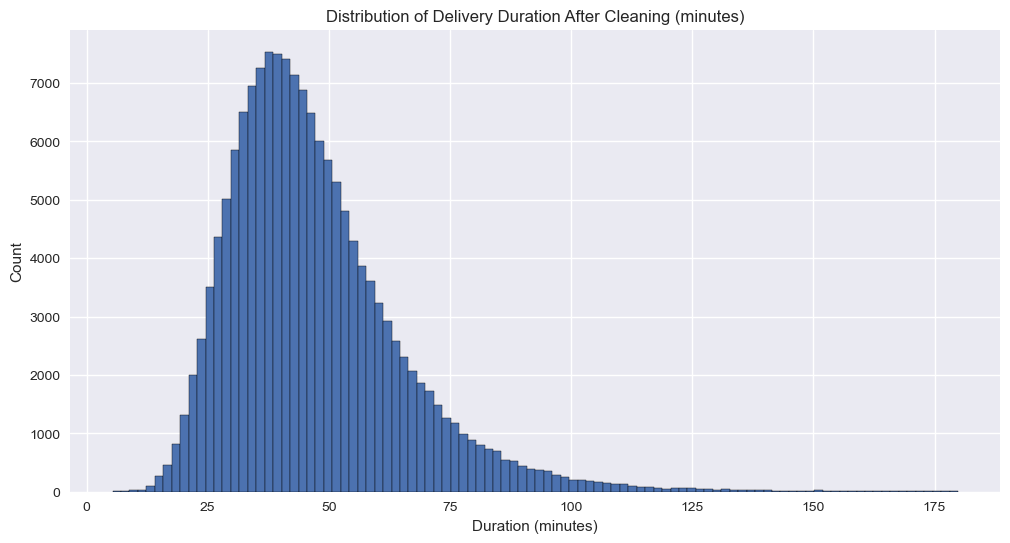

In [17]:
# Analyze and handle outliers in delivery duration
print("Before outlier handling:")
print(f"Total orders: {len(df)}")

# Plot distribution of delivery times
plt.figure(figsize=(12, 6))
plt.hist(df['delivery_duration']/60, bins=100, edgecolor='black')
plt.title('Distribution of Delivery Duration (minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

# Remove extreme outliers (e.g., deliveries taking more than 3 hours or less than 5 minutes)
min_duration = 5 * 60  # 5 minutes in seconds
max_duration = 3 * 60 * 60  # 3 hours in seconds

df_cleaned = df[
    (df['delivery_duration'] >= min_duration) & 
    (df['delivery_duration'] <= max_duration)
]

print("\nAfter outlier handling:")
print(f"Total orders: {len(df_cleaned)}")
print(f"Removed orders: {len(df) - len(df_cleaned)}")

# Show new statistics
print("\nDelivery Duration Statistics After Cleaning (in minutes):")
print((df_cleaned['delivery_duration']/60).describe())

# Plot new distribution
plt.figure(figsize=(12, 6))
plt.hist(df_cleaned['delivery_duration']/60, bins=100, edgecolor='black')
plt.title('Distribution of Delivery Duration After Cleaning (minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

# Update our main dataframe
df = df_cleaned

### Creating new features

New Feature Statistics:

hour:
count    153837.000000
mean          8.670872
std           8.717851
min           0.000000
25%           2.000000
50%           3.000000
75%          19.000000
max          23.000000
Name: hour, dtype: float64

day_of_week:
count    153837.000000
mean          3.198275
std           1.982044
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: day_of_week, dtype: float64

is_weekend:
count    153837.000000
mean          0.325214
std           0.468456
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: is_weekend, dtype: float64

is_night:
count    153837.000000
mean          0.676183
std           0.467933
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: is_night, dtype: float64

is_rush_hour:
count    153837.000000
mean          0.115629
std      

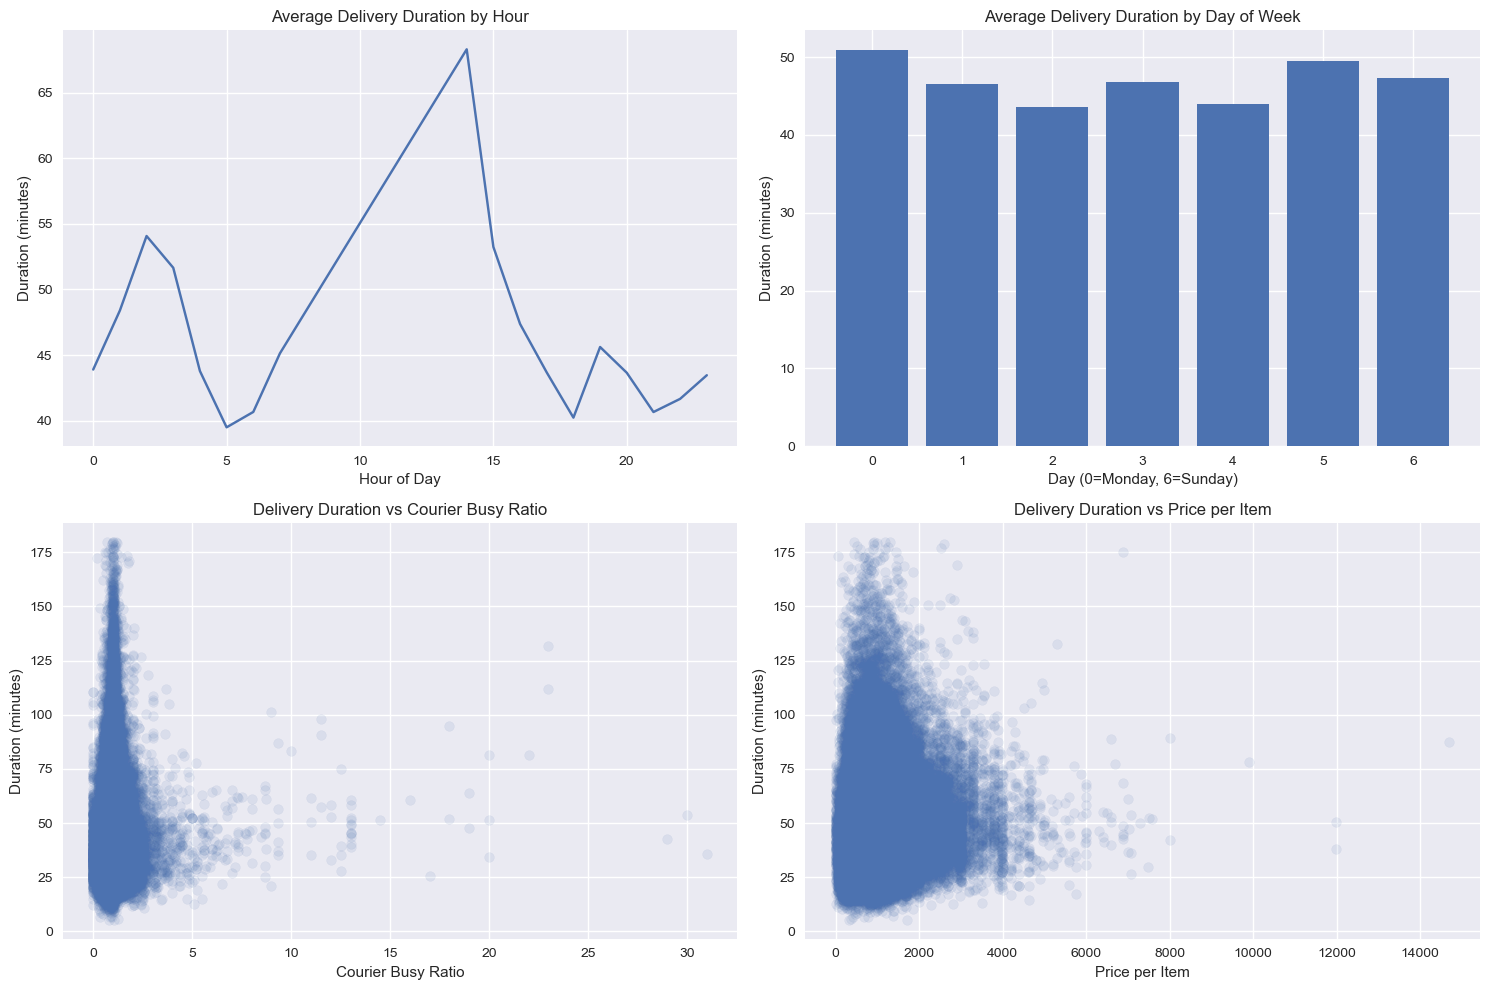

In [18]:
# 1. Time-based features
df['hour'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.dayofweek  # 0=Monday, 6=Sunday
df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)
df['month'] = df['created_at'].dt.month
df['is_night'] = df['hour'].isin([23,0,1,2,3,4,5]).astype(int)
df['is_rush_hour'] = df['hour'].isin([8,9,12,13,17,18,19]).astype(int)

# 2. Interaction features
df['price_per_item'] = df['subtotal'] / df['total_items']
df['courier_busy_ratio'] = df['total_busy_couriers'] / df['total_onshift_couriers']
df['estimated_total_time'] = (df['estimated_order_place_duration'] + 
                             df['estimated_store_to_consumer_driving_duration'])

# 3. Market density features
df['market_courier_density'] = df['total_onshift_couriers'] / df.groupby('market_id')['total_onshift_couriers'].transform('mean')
df['market_order_density'] = df['total_outstanding_orders'] / df.groupby('market_id')['total_outstanding_orders'].transform('mean')

# Print summary of new features
print("New Feature Statistics:")
new_features = ['hour', 'day_of_week', 'is_weekend', 'is_night', 'is_rush_hour',
                'price_per_item', 'courier_busy_ratio', 'estimated_total_time',
                'market_courier_density', 'market_order_density']

for feature in new_features:
    print(f"\n{feature}:")
    print(df[feature].describe())

# Visualize some key features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Average delivery duration by hour
hourly_avg = df.groupby('hour')['delivery_duration'].mean() / 60  # Convert to minutes
axes[0,0].plot(hourly_avg.index, hourly_avg.values)
axes[0,0].set_title('Average Delivery Duration by Hour')
axes[0,0].set_xlabel('Hour of Day')
axes[0,0].set_ylabel('Duration (minutes)')

# Average delivery duration by day of week
daily_avg = df.groupby('day_of_week')['delivery_duration'].mean() / 60
axes[0,1].bar(daily_avg.index, daily_avg.values)
axes[0,1].set_title('Average Delivery Duration by Day of Week')
axes[0,1].set_xlabel('Day (0=Monday, 6=Sunday)')
axes[0,1].set_ylabel('Duration (minutes)')

# Delivery duration vs courier busy ratio
axes[1,0].scatter(df['courier_busy_ratio'], df['delivery_duration']/60, alpha=0.1)
axes[1,0].set_title('Delivery Duration vs Courier Busy Ratio')
axes[1,0].set_xlabel('Courier Busy Ratio')
axes[1,0].set_ylabel('Duration (minutes)')

# Delivery duration vs price per item
axes[1,1].scatter(df['price_per_item'], df['delivery_duration']/60, alpha=0.1)
axes[1,1].set_title('Delivery Duration vs Price per Item')
axes[1,1].set_xlabel('Price per Item')
axes[1,1].set_ylabel('Duration (minutes)')

plt.tight_layout()
plt.show()

Before fixing courier_busy_ratio:
count    1.510610e+05
mean              inf
std               NaN
min      0.000000e+00
25%      8.421053e-01
50%      9.714286e-01
75%      1.018182e+00
max               inf
Name: courier_busy_ratio, dtype: float64

After fixing courier_busy_ratio:
count    153837.000000
mean          0.877008
std           0.199736
min           0.000000
25%           0.833333
50%           0.971429
75%           1.000000
max           1.000000
Name: courier_busy_ratio, dtype: float64

Correlations with delivery_duration:
hour              -0.166639
hour_sin           0.135265
hour_cos           0.098283
day_of_week       -0.010838
day_of_week_sin   -0.058475
day_of_week_cos    0.070629
Name: delivery_duration, dtype: float64


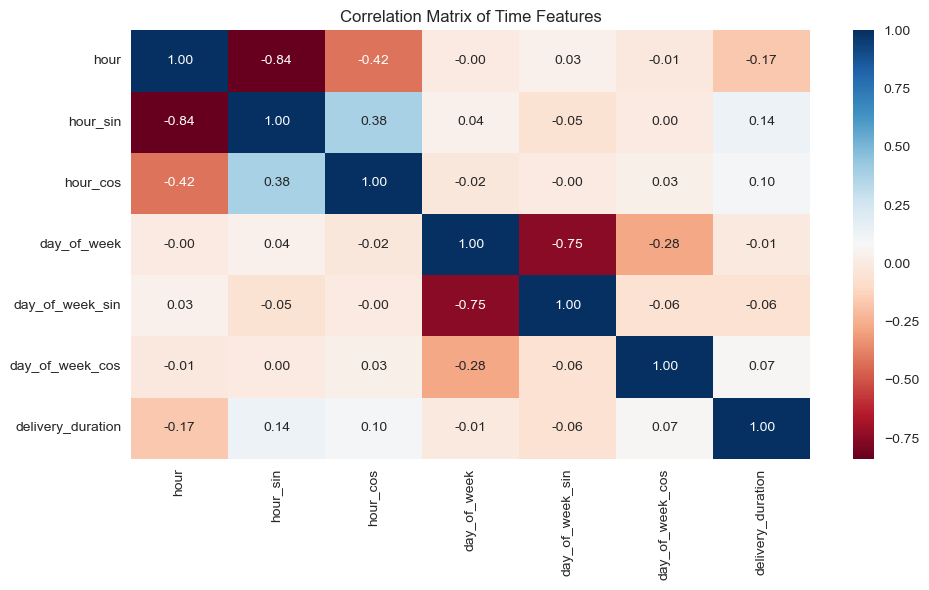

In [19]:
# 1. Fix courier_busy_ratio infinity issues
print("Before fixing courier_busy_ratio:")
print(df['courier_busy_ratio'].describe())

# Fix by handling division by zero
df['courier_busy_ratio'] = df['total_busy_couriers'] / df['total_onshift_couriers'].clip(lower=1)
# Clip the ratio to a reasonable range (0 to 1)
df['courier_busy_ratio'] = df['courier_busy_ratio'].clip(0, 1)

print("\nAfter fixing courier_busy_ratio:")
print(df['courier_busy_ratio'].describe())

# 2. Create circular features while keeping original
def create_circular_features(df, feature, max_val, keep_original=True):
    """
    Create sine and cosine features for cyclic data.
    """
    df[f'{feature}_sin'] = np.sin(2 * np.pi * df[feature] / max_val)
    df[f'{feature}_cos'] = np.cos(2 * np.pi * df[feature] / max_val)
    if not keep_original:
        df = df.drop(columns=[feature])
    return df

# Apply circular encoding
df = create_circular_features(df, 'hour', 24, keep_original=True)
df = create_circular_features(df, 'day_of_week', 7, keep_original=True)

# Show correlations with target
print("\nCorrelations with delivery_duration:")
features = ['hour', 'hour_sin', 'hour_cos', 
           'day_of_week', 'day_of_week_sin', 'day_of_week_cos']
correlations = df[features + ['delivery_duration']].corr()['delivery_duration'].sort_values()
print(correlations[features])

# Visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df[features + ['delivery_duration']].corr(), 
            annot=True, fmt='.2f', cmap='RdBu')
plt.title('Correlation Matrix of Time Features')
plt.tight_layout()
plt.show()

Feature Correlations with Delivery Duration:
                                         feature  correlation
22                          estimated_total_time     0.265403
10  estimated_store_to_consumer_driving_duration     0.242929
2                                       subtotal     0.218421
24                          market_order_density     0.192157
8                       total_outstanding_orders     0.172783
3                             num_distinct_items     0.159053
18                                      is_night     0.149891
12                                      hour_sin     0.135265
5                                 max_item_price     0.132614
1                                    total_items     0.117667
21                            courier_busy_ratio     0.101628
9                 estimated_order_place_duration     0.101133
13                                      hour_cos     0.098283
7                            total_busy_couriers     0.079949
20                       

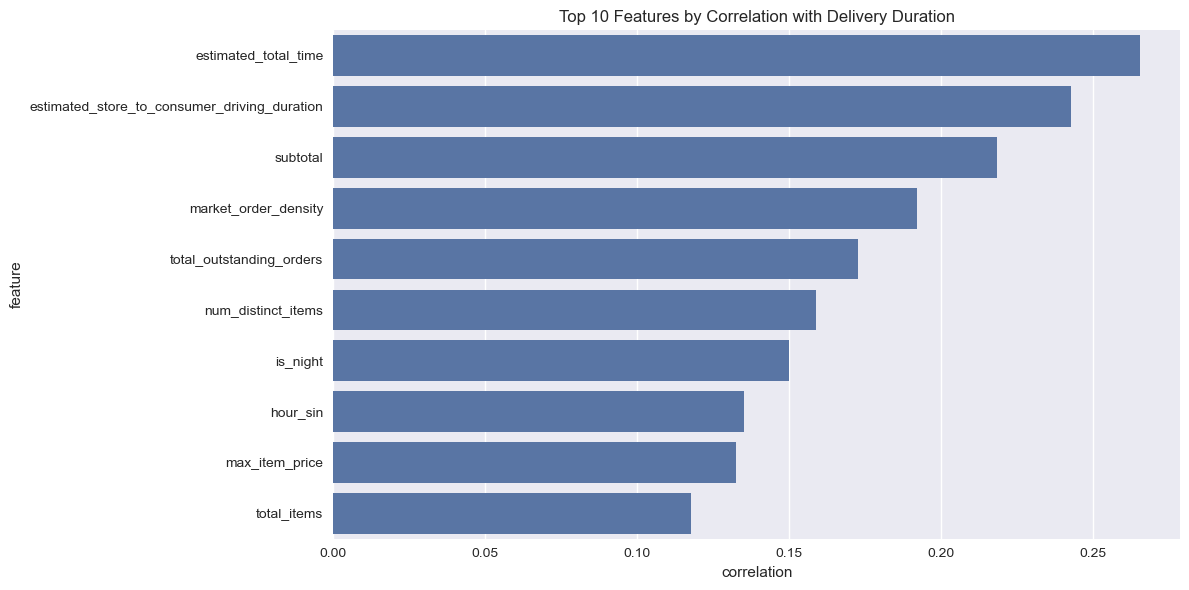

In [20]:
# Create final feature set
feature_columns = [
    # Original numeric features
    'market_id', 'total_items', 'subtotal', 'num_distinct_items',
    'min_item_price', 'max_item_price', 'total_onshift_couriers',
    'total_busy_couriers', 'total_outstanding_orders',
    'estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration',
    
    # Time features (both original and circular)
    'hour', 'hour_sin', 'hour_cos',
    'day_of_week', 'day_of_week_sin', 'day_of_week_cos',
    'is_weekend', 'is_night', 'is_rush_hour',
    
    # Engineered features
    'price_per_item', 'courier_busy_ratio', 'estimated_total_time',
    'market_courier_density', 'market_order_density'
]

# Create final feature matrix
X = df[feature_columns]
y = df['delivery_duration']

# Check feature correlations with target
correlations = pd.DataFrame({
    'feature': feature_columns,
    'correlation': [X[col].corr(y) for col in feature_columns]
}).sort_values('correlation', ascending=False)

print("Feature Correlations with Delivery Duration:")
print(correlations)

# Visualize top 10 most important features
plt.figure(figsize=(12, 6))
sns.barplot(data=correlations.head(10), x='correlation', y='feature')
plt.title('Top 10 Features by Correlation with Delivery Duration')
plt.tight_layout()
plt.show()

Updated Feature Correlations (showing top 15):
                                         feature  correlation
25                        order_to_courier_ratio     0.281751
27                     estimated_time_busy_ratio     0.267561
22                          estimated_total_time     0.265403
10  estimated_store_to_consumer_driving_duration     0.242929
26                           total_value_density     0.241018
2                                       subtotal     0.218421
24                          market_order_density     0.192157
8                       total_outstanding_orders     0.172783
3                             num_distinct_items     0.159053
18                                      is_night     0.149891
12                                      hour_sin     0.135265
5                                 max_item_price     0.132614
1                                    total_items     0.117667
21                            courier_busy_ratio     0.101628
9                 estim

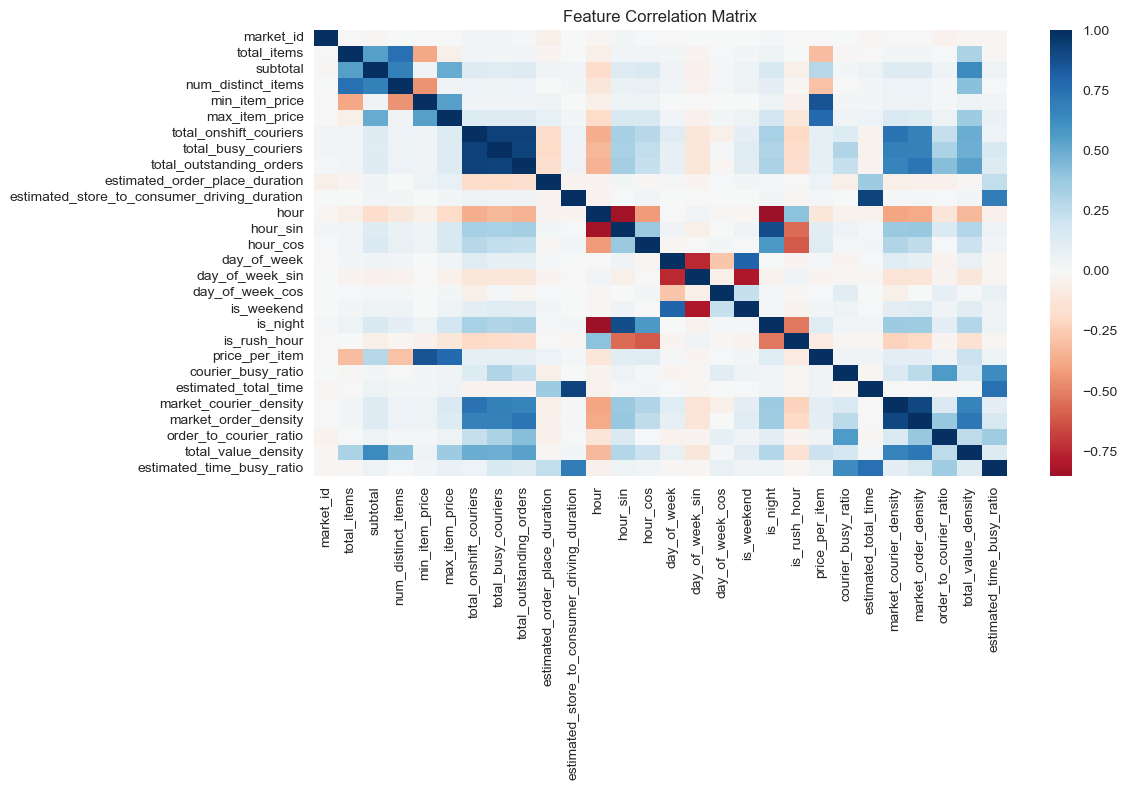

In [21]:
# Create additional interaction features based on our findings
df['order_to_courier_ratio'] = df['total_outstanding_orders'] / df['total_onshift_couriers'].clip(lower=1)
df['total_value_density'] = df['subtotal'] * df['market_order_density']
df['estimated_time_busy_ratio'] = df['estimated_total_time'] * df['courier_busy_ratio']

# Update our feature list
additional_features = [
    'order_to_courier_ratio',
    'total_value_density',
    'estimated_time_busy_ratio'
]

feature_columns = feature_columns + additional_features

# Create updated feature matrix
X = df[feature_columns]
y = df['delivery_duration']

# Check new correlations
new_correlations = pd.DataFrame({
    'feature': feature_columns,
    'correlation': [X[col].corr(y) for col in feature_columns]
}).sort_values('correlation', ascending=False)

print("Updated Feature Correlations (showing top 15):")
print(new_correlations.head(15))

# Visualize correlations of all features
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), cmap='RdBu', center=0)
plt.title('Feature Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [22]:
df.order_protocol.value_counts()

order_protocol
1.0    43432
3.0    41334
5.0    34472
2.0    18953
4.0    15011
6.0      616
7.0       19
Name: count, dtype: int64

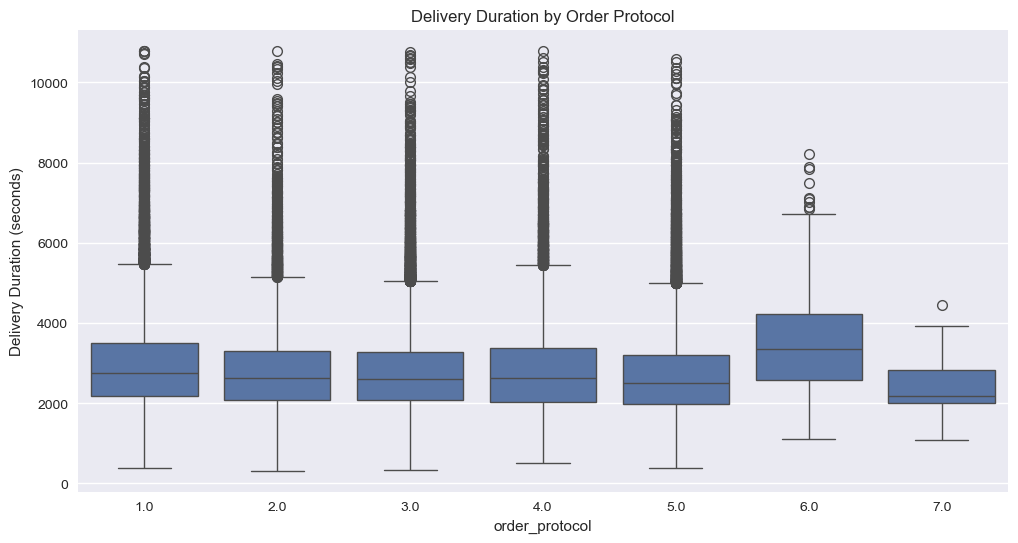


Before grouping rare categories:
order_protocol
1.0    43432
3.0    41334
5.0    34472
2.0    18953
4.0    15011
6.0      616
7.0       19
Name: count, dtype: int64

After grouping rare categories:
order_protocol
1.0    43432
3.0    41334
5.0    34472
2.0    18953
4.0    15011
8.0      635
Name: count, dtype: int64

Feature matrix shape: (153837, 110)

New protocol-related columns:
['protocol_1.0', 'protocol_2.0', 'protocol_3.0', 'protocol_4.0', 'protocol_5.0', 'protocol_8.0']

Protocol correlations with delivery duration:
        feature  correlation
0  protocol_1.0     0.074796
5  protocol_8.0     0.040164
3  protocol_4.0     0.010670
1  protocol_2.0    -0.006388
2  protocol_3.0    -0.026226
4  protocol_5.0    -0.061597


In [23]:
# First, let's see if order_protocol has any relationship with delivery duration
plt.figure(figsize=(12, 6))
sns.boxplot(x='order_protocol', y='delivery_duration', data=df)
plt.title('Delivery Duration by Order Protocol')
plt.ylabel('Delivery Duration (seconds)')
plt.show()

# Group rare categories
print("\nBefore grouping rare categories:")
print(df['order_protocol'].value_counts())

df_encoded = df.copy()
# Group protocols 6 and 7 into a new category (e.g., 8)
df_encoded['order_protocol'] = df['order_protocol'].replace({6.0: 8.0, 7.0: 8.0})

print("\nAfter grouping rare categories:")
print(df_encoded['order_protocol'].value_counts())

# One-hot encode store_primary_category
df_encoded = pd.get_dummies(df_encoded, columns=['store_primary_category'], drop_first=True)

# Create dummy variables for order_protocol
df_encoded = pd.get_dummies(df_encoded, columns=['order_protocol'], prefix='protocol')

# Update feature columns
feature_columns = [col for col in df_encoded.columns 
                  if col not in ['created_at', 'actual_delivery_time', 'delivery_duration']]

# Create updated feature matrix
X = df_encoded[feature_columns]
y = df_encoded['delivery_duration']

print(f"\nFeature matrix shape: {X.shape}")
print("\nNew protocol-related columns:")
protocol_cols = [col for col in X.columns if 'protocol' in col]
print(protocol_cols)

# Check correlations with delivery duration
protocol_correlations = pd.DataFrame({
    'feature': protocol_cols,
    'correlation': [X[col].corr(y) for col in protocol_cols]
}).sort_values('correlation', ascending=False)

print("\nProtocol correlations with delivery duration:")
print(protocol_correlations)

Linear Regression RMSE: 905.45 seconds
Ridge RMSE: 905.45 seconds
Lasso RMSE: 905.44 seconds
Random Forest RMSE: 873.91 seconds
Gradient Boosting RMSE: 874.05 seconds
XGBoost RMSE: 873.91 seconds


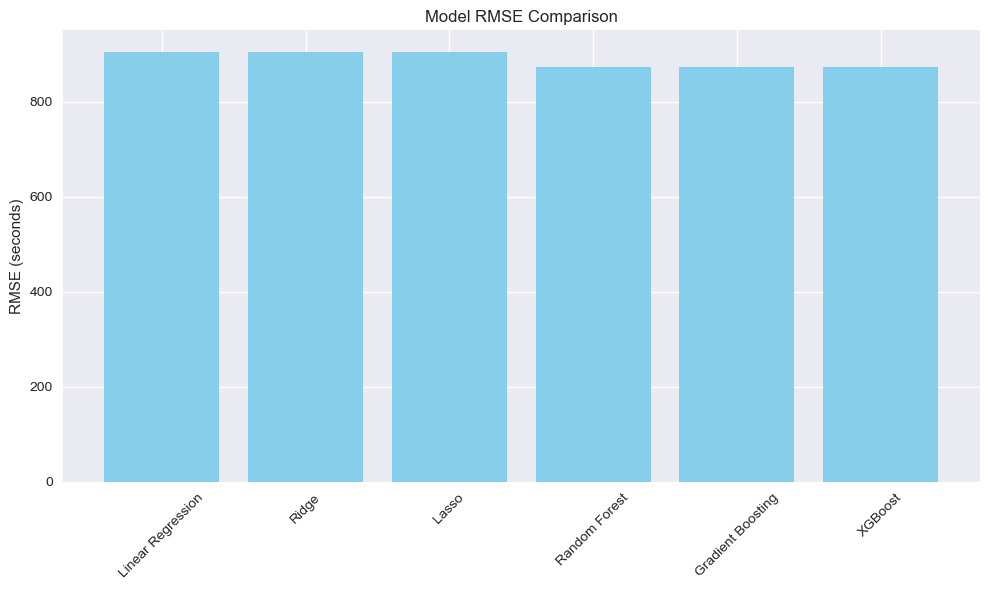

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results[name] = rmse
    print(f"{name} RMSE: {rmse:.2f} seconds")

# Visualize model performance
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title('Model RMSE Comparison')
plt.ylabel('RMSE (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Linear Regression is crying because of multicollinearity, let's try to fix that

In [25]:
# 1. Remove multicollinearity
from sklearn.feature_selection import VarianceThreshold

# Remove constant and quasi-constant features
selector = VarianceThreshold(threshold=0.01)  # features with variance < 0.01 will be removed
X_selected = selector.fit_transform(X)
selected_features = X.columns[selector.get_support()].tolist()

print(f"Features reduced from {X.shape[1]} to {len(selected_features)}")
print("\nRemoved features:")
print([col for col in X.columns if col not in selected_features])

# 2. Train improved models with selected features
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define improved models
improved_models = {
    'Ridge': Ridge(alpha=10.0),  # increased regularization
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=5,
        min_samples_split=5,
        random_state=42
    ),
    'XGBoost': XGBRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=5,
        min_child_weight=3,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
}

# Train and evaluate improved models
results = {}
for name, model in improved_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = rmse
    print(f"{name} RMSE: {rmse:.2f} seconds ({rmse/60:.2f} minutes)")
    
    if 'XGBoost' in name:
        # Get feature importance for XGBoost
        importance = pd.DataFrame({
            'feature': selected_features,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
        print("\nTop 10 Most Important Features:")
        print(importance.head(10))

Features reduced from 110 to 58

Removed features:
['is_imputed', 'store_primary_category_african', 'store_primary_category_alcohol', 'store_primary_category_alcohol-plus-food', 'store_primary_category_argentine', 'store_primary_category_belgian', 'store_primary_category_brazilian', 'store_primary_category_british', 'store_primary_category_bubble-tea', 'store_primary_category_burmese', 'store_primary_category_cajun', 'store_primary_category_caribbean', 'store_primary_category_catering', 'store_primary_category_cheese', 'store_primary_category_chocolate', 'store_primary_category_comfort-food', 'store_primary_category_convenience-store', 'store_primary_category_dim-sum', 'store_primary_category_ethiopian', 'store_primary_category_european', 'store_primary_category_filipino', 'store_primary_category_french', 'store_primary_category_gastropub', 'store_primary_category_german', 'store_primary_category_gluten-free', 'store_primary_category_hawaiian', 'store_primary_category_indonesian', 'sto

In [26]:
importance

,feature,importance
27,order_to_courier_ratio,0.137311
20,estimated_total_time,0.074322
29,estimated_time_busy_ratio,0.071615
12,hour,0.063272
28,total_value_density,0.040273
3,subtotal,0.039120
13,day_of_week,0.027689
26,day_of_week_cos,0.026581
16,is_night,0.025764
7,total_onshift_couriers,0.024783


Linear Regression:
  RMSE: 905.45 seconds (15.09 minutes)
  MAE: 666.78 seconds (11.11 minutes)
Ridge:
  RMSE: 905.45 seconds (15.09 minutes)
  MAE: 666.78 seconds (11.11 minutes)
Lasso:
  RMSE: 905.44 seconds (15.09 minutes)
  MAE: 666.75 seconds (11.11 minutes)
Random Forest:
  RMSE: 873.91 seconds (14.57 minutes)
  MAE: 645.44 seconds (10.76 minutes)
Gradient Boosting:
  RMSE: 874.05 seconds (14.57 minutes)
  MAE: 642.64 seconds (10.71 minutes)
XGBoost:
  RMSE: 873.91 seconds (14.57 minutes)
  MAE: 642.37 seconds (10.71 minutes)


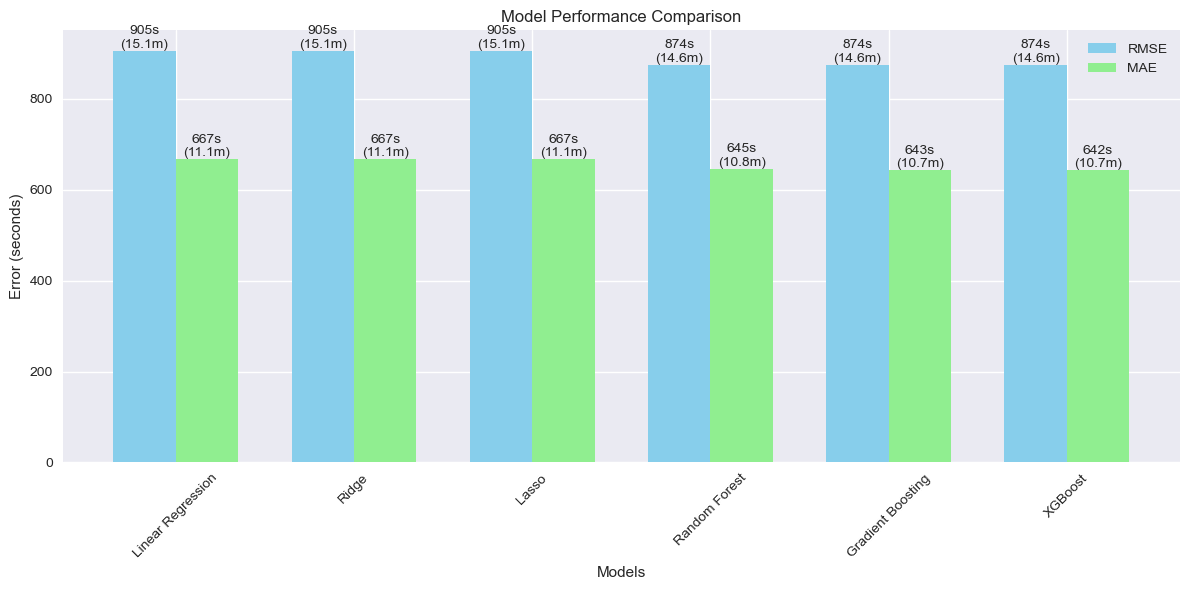


Improvement over Linear Regression:

Ridge:
  RMSE improvement: -0.0%
  MAE improvement: -0.0%

Lasso:
  RMSE improvement: 0.0%
  MAE improvement: 0.0%

Random Forest:
  RMSE improvement: 3.5%
  MAE improvement: 3.2%

Gradient Boosting:
  RMSE improvement: 3.5%
  MAE improvement: 3.6%

XGBoost:
  RMSE improvement: 3.5%
  MAE improvement: 3.7%


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

# Train and evaluate models
results_rmse = {}
results_mae = {}

for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store results
    results_rmse[name] = rmse
    results_mae[name] = mae
    
    print(f"{name}:")
    print(f"  RMSE: {rmse:.2f} seconds ({rmse/60:.2f} minutes)")
    print(f"  MAE: {mae:.2f} seconds ({mae/60:.2f} minutes)")

# Prepare data for plotting
models_list = list(results_rmse.keys())
rmse_values = list(results_rmse.values())
mae_values = list(results_mae.values())

# Create grouped bar plot
plt.figure(figsize=(12, 6))
x = np.arange(len(models_list))
width = 0.35

plt.bar(x - width/2, rmse_values, width, label='RMSE', color='skyblue')
plt.bar(x + width/2, mae_values, width, label='MAE', color='lightgreen')

plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Error (seconds)')
plt.xticks(x, models_list, rotation=45)
plt.legend()

# Add value labels on the bars
for i, v in enumerate(rmse_values):
    plt.text(i - width/2, v, f'{v:.0f}s\n({v/60:.1f}m)', 
             ha='center', va='bottom')
for i, v in enumerate(mae_values):
    plt.text(i + width/2, v, f'{v:.0f}s\n({v/60:.1f}m)', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print improvement percentages
baseline_rmse = results_rmse['Linear Regression']
baseline_mae = results_mae['Linear Regression']

print("\nImprovement over Linear Regression:")
for name in models_list[1:]:  # Skip Linear Regression
    rmse_improvement = ((baseline_rmse - results_rmse[name]) / baseline_rmse) * 100
    mae_improvement = ((baseline_mae - results_mae[name]) / baseline_mae) * 100
    print(f"\n{name}:")
    print(f"  RMSE improvement: {rmse_improvement:.1f}%")
    print(f"  MAE improvement: {mae_improvement:.1f}%")

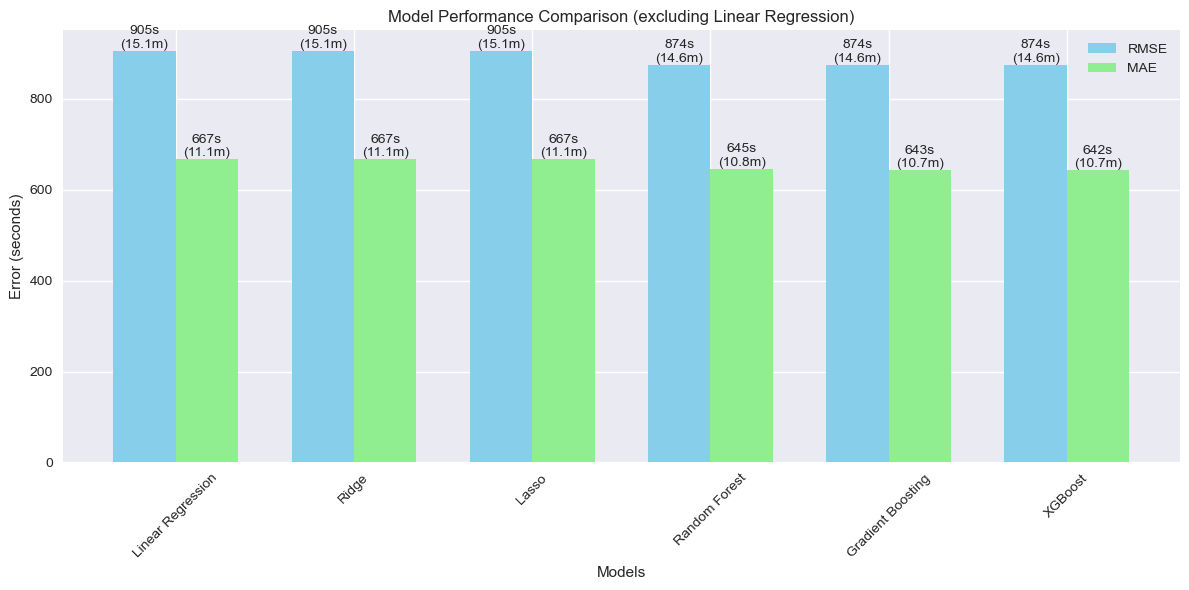


Model Comparison:
Best RMSE: XGBoost (873.91 seconds, 14.57 minutes)
Best MAE: XGBoost (642.37 seconds, 10.71 minutes)

Improvement over Ridge:

Lasso:
  RMSE improvement: 0.0%
  MAE improvement: 0.0%

Random Forest:
  RMSE improvement: 3.5%
  MAE improvement: 3.2%

Gradient Boosting:
  RMSE improvement: 3.5%
  MAE improvement: 3.6%

XGBoost:
  RMSE improvement: 3.5%
  MAE improvement: 3.7%


In [28]:
# # Filter out Linear Regression
# models_list = [name for name in results_rmse.keys() if name != 'Linear Regression']
# rmse_values = [results_rmse[name] for name in models_list]
# mae_values = [results_mae[name] for name in models_list]

# Create grouped bar plot
plt.figure(figsize=(12, 6))
x = np.arange(len(models_list))
width = 0.35

plt.bar(x - width/2, rmse_values, width, label='RMSE', color='skyblue')
plt.bar(x + width/2, mae_values, width, label='MAE', color='lightgreen')

plt.title('Model Performance Comparison (excluding Linear Regression)')
plt.xlabel('Models')
plt.ylabel('Error (seconds)')
plt.xticks(x, models_list, rotation=45)
plt.legend()

# Add value labels on the bars
for i, v in enumerate(rmse_values):
    plt.text(i - width/2, v, f'{v:.0f}s\n({v/60:.1f}m)', 
             ha='center', va='bottom')
for i, v in enumerate(mae_values):
    plt.text(i + width/2, v, f'{v:.0f}s\n({v/60:.1f}m)', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print comparison between remaining models
best_rmse = min(rmse_values)
best_mae = min(mae_values)
best_model_rmse = models_list[rmse_values.index(best_rmse)]
best_model_mae = models_list[mae_values.index(best_mae)]

print("\nModel Comparison:")
print(f"Best RMSE: {best_model_rmse} ({best_rmse:.2f} seconds, {best_rmse/60:.2f} minutes)")
print(f"Best MAE: {best_model_mae} ({best_mae:.2f} seconds, {best_mae/60:.2f} minutes)")

# Print improvements relative to Ridge (as new baseline)
ridge_rmse = results_rmse['Ridge']
ridge_mae = results_mae['Ridge']

print("\nImprovement over Ridge:")
for name in models_list[2:]:  # Skip Ridge itself
    rmse_improvement = ((ridge_rmse - results_rmse[name]) / ridge_rmse) * 100
    mae_improvement = ((ridge_mae - results_mae[name]) / ridge_mae) * 100
    print(f"\n{name}:")
    print(f"  RMSE improvement: {rmse_improvement:.1f}%")
    print(f"  MAE improvement: {mae_improvement:.1f}%")

Method 1: GridSearchCV with TimeSeriesSplit
-----------------------------------------
Fitting 5 folds for each of 64 candidates, totalling 320 fits

Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.8}
Best RMSE score: 862.61

GridSearchCV Test Set Performance:
RMSE: 845.12 seconds (14.09 minutes)
MAE: 618.79 seconds (10.31 minutes)

Method 2: XGBoost with Native Cross-Validation
-----------------------------------------
[0]	train-rmse:1070.04366+0.57022	test-rmse:1070.11074+2.70803
[100]	train-rmse:898.82271+0.77006	test-rmse:902.46289+3.60661
[200]	train-rmse:880.41803+0.91773	test-rmse:886.15858+3.61863
[300]	train-rmse:871.22357+0.73368	test-rmse:878.82862+3.80323
[400]	train-rmse:865.19901+0.69990	test-rmse:874.41191+3.77252
[500]	train-rmse:860.52678+0.72947	test-rmse:871.31359+3.61136
[600]	train-rmse:856.60360+0.79078	test-rmse:868.94066+3.51379
[700]	train-rmse:853.10648+0.78025	tes

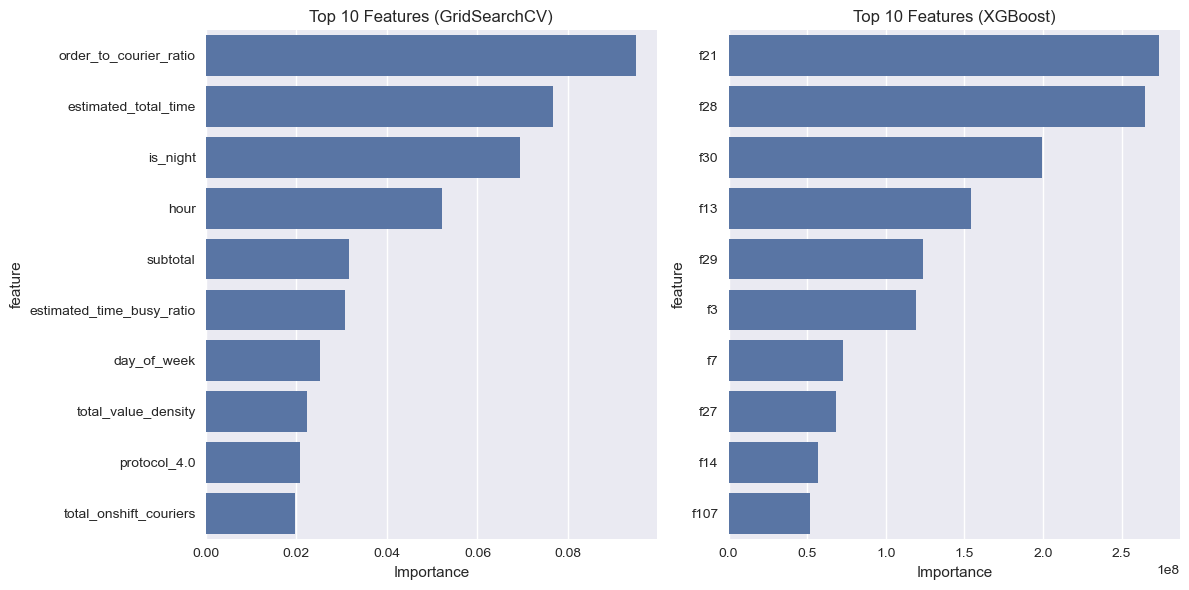

In [30]:
import warnings
import xgboost as xgb
from sklearn.metrics import root_mean_squared_error
warnings.filterwarnings('ignore')

print("Method 1: GridSearchCV with TimeSeriesSplit")
print("-----------------------------------------")

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Use TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=tscv,
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

print("\nBest parameters found:", grid_search.best_params_)
print(f"Best RMSE score: {-grid_search.best_score_:.2f}")

# Evaluate GridSearchCV model
grid_pred = grid_search.predict(X_test_scaled)
grid_rmse = root_mean_squared_error(y_test, grid_pred)
grid_mae = mean_absolute_error(y_test, grid_pred)

print("\nGridSearchCV Test Set Performance:")
print(f"RMSE: {grid_rmse:.2f} seconds ({grid_rmse/60:.2f} minutes)")
print(f"MAE: {grid_mae:.2f} seconds ({grid_mae/60:.2f} minutes)")

print("\nMethod 2: XGBoost with Native Cross-Validation")
print("-----------------------------------------")

# Define parameters for XGBoost
xgb_params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.05,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'tree_method': 'hist'  # For faster training
}

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Cross-validation with XGBoost
cv_results = xgb.cv(
    xgb_params,
    dtrain,
    num_boost_round=1000,
    nfold=5,
    early_stopping_rounds=50,
    verbose_eval=100,
    seed=42
)

# Train final XGBoost model with best number of rounds
best_rounds = cv_results.shape[0]
xgb_model = xgb.train(
    xgb_params,
    dtrain,
    num_boost_round=best_rounds
)

# Evaluate XGBoost model
xgb_pred = xgb_model.predict(dtest)
xgb_rmse = root_mean_squared_error(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)

print("\nXGBoost Native CV Test Set Performance:")
print(f"Best number of rounds: {best_rounds}")
print(f"RMSE: {xgb_rmse:.2f} seconds ({xgb_rmse/60:.2f} minutes)")
print(f"MAE: {xgb_mae:.2f} seconds ({xgb_mae/60:.2f} minutes)")

# ... (keep all previous code the same until the feature importance part)

# Feature importance for both models
print("\nTop 10 Important Features (GridSearchCV):")
grid_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': grid_search.best_estimator_.feature_importances_
}).sort_values('importance', ascending=False)
print(grid_importance.head(10))

print("\nTop 10 Important Features (XGBoost):")
# Fix for XGBoost feature importance
importance_dict = xgb_model.get_score(importance_type='gain')
xgb_importance = pd.DataFrame([
    {'feature': feature, 'importance': importance}
    for feature, importance in importance_dict.items()
]).sort_values('importance', ascending=False)
print(xgb_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=grid_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Features (GridSearchCV)')
plt.xlabel('Importance')

plt.subplot(1, 2, 2)
sns.barplot(data=xgb_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Features (XGBoost)')
plt.xlabel('Importance')

plt.tight_layout()
plt.show()

# Real Life Data Testing

Real data shape: (43477, 15)

Real data columns:
['market_id', 'created_at', 'store_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_couriers', 'total_busy_couriers', 'total_outstanding_orders', 'estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration']

Sample of real data:
   market_id           created_at  store_id store_primary_category  \
0        2.0  2015-02-13 00:00:02       853                italian   
1        1.0  2015-02-13 00:00:04      2118                chinese   
2        1.0  2015-02-13 00:00:18       624               american   
3        2.0  2015-02-13 00:00:50      1185                dessert   
4        4.0  2015-02-13 00:00:55      4377                  greek   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            1      1450                   1            1450   
1             1.0   

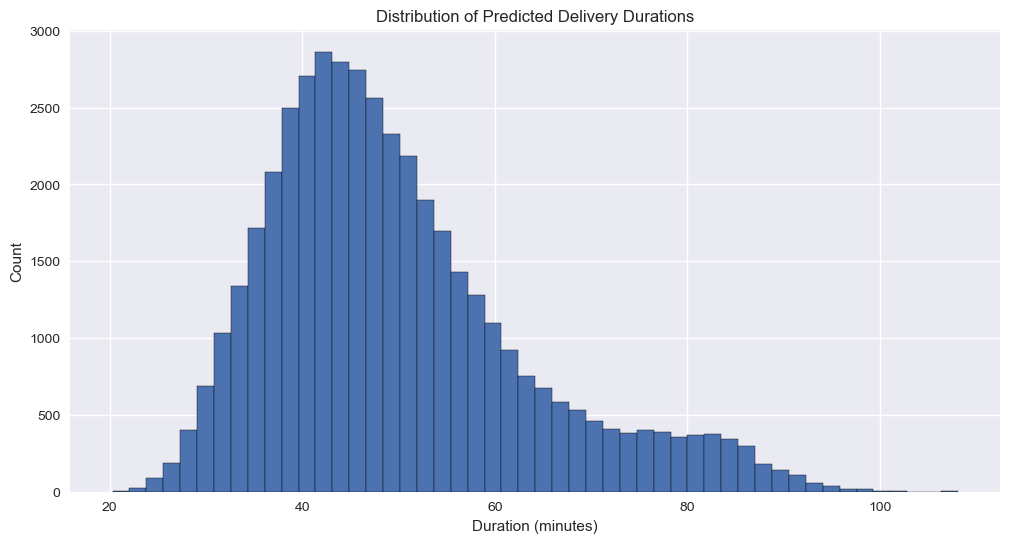

In [32]:
# Load the real data
real_data = pd.read_csv('/Users/rakan/Coding/Ironhack AI Engineering Bootcamp/ai-eng-nbs-public/Projects/Project 1 (ETA dataset)/real_data_etas.csv')

# First, let's look at the data
print("Real data shape:", real_data.shape)
print("\nReal data columns:")
print(real_data.columns.tolist())
print("\nSample of real data:")
print(real_data.head())

# Process the real data the same way we processed training data
def prepare_prediction_data(df):
    # Convert timestamps
    df['created_at'] = pd.to_datetime(df['created_at'])
    
    # Create all the same features we used for training
    # Time-based features
    df['hour'] = df['created_at'].dt.hour
    df['day_of_week'] = df['created_at'].dt.dayofweek
    df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)
    df['is_night'] = df['hour'].isin([23,0,1,2,3,4,5]).astype(int)
    df['is_rush_hour'] = df['hour'].isin([8,9,12,13,17,18,19]).astype(int)
    
    # Circular encoding
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
    
    # Interaction features
    df['price_per_item'] = df['subtotal'] / df['total_items']
    df['courier_busy_ratio'] = df['total_busy_couriers'] / df['total_onshift_couriers'].clip(lower=1)
    df['courier_busy_ratio'] = df['courier_busy_ratio'].clip(0, 1)
    df['estimated_total_time'] = (df['estimated_order_place_duration'] + 
                                df['estimated_store_to_consumer_driving_duration'])
    
    # Market density features
    df['market_courier_density'] = df['total_onshift_couriers'] / df.groupby('market_id')['total_onshift_couriers'].transform('mean')
    df['market_order_density'] = df['total_outstanding_orders'] / df.groupby('market_id')['total_outstanding_orders'].transform('mean')
    
    # Additional interaction features
    df['order_to_courier_ratio'] = df['total_outstanding_orders'] / df['total_onshift_couriers'].clip(lower=1)
    df['total_value_density'] = df['subtotal'] * df['market_order_density']
    df['estimated_time_busy_ratio'] = df['estimated_total_time'] * df['courier_busy_ratio']
    
    # One-hot encode categorical variables
    df = pd.get_dummies(df, columns=['store_primary_category', 'order_protocol'], drop_first=True)
    
    return df

# Prepare real data
real_data_processed = prepare_prediction_data(real_data)

# Ensure all columns match training data
missing_cols = set(X.columns) - set(real_data_processed.columns)
extra_cols = set(real_data_processed.columns) - set(X.columns)

print("\nMissing columns in real data:", missing_cols)
print("Extra columns in real data:", extra_cols)

# Add missing columns with zeros
for col in missing_cols:
    real_data_processed[col] = 0

# Select only the columns we used for training
X_real = real_data_processed[X.columns]

# Scale the features
X_real_scaled = scaler.transform(X_real)

# Make predictions using our best model (using the GridSearchCV model as it performed slightly better)
predictions = grid_search.predict(X_real_scaled)

# Add predictions to the original dataframe
real_data['predicted_duration'] = predictions
real_data['predicted_duration_minutes'] = predictions / 60

# Show prediction statistics
print("\nPrediction Statistics (in minutes):")
print(real_data['predicted_duration_minutes'].describe())

# Save predictions to CSV
results = real_data[['created_at', 'predicted_duration', 'predicted_duration_minutes']]
results.to_csv('delivery_predictions.csv', index=False)
print("\nPredictions saved to 'delivery_predictions.csv'")

# Visualize predictions distribution
plt.figure(figsize=(12, 6))
plt.hist(real_data['predicted_duration_minutes'], bins=50, edgecolor='black')
plt.title('Distribution of Predicted Delivery Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Load and prep
real_data = pd.read_csv('real_data.csv')
real_data_processed = prepare_prediction_data(real_data)

# Match columns
for col in set(X.columns) - set(real_data_processed.columns):
    real_data_processed[col] = 0
X_real = real_data_processed[X.columns]

# Scale and predict
X_real_scaled = scaler.transform(X_real)
predictions = grid_search.predict(X_real_scaled)

# Save in required format
submission = pd.DataFrame({
    'delivery_duration': predictions.astype(int)
})
submission.to_csv('submission.csv', index=False)

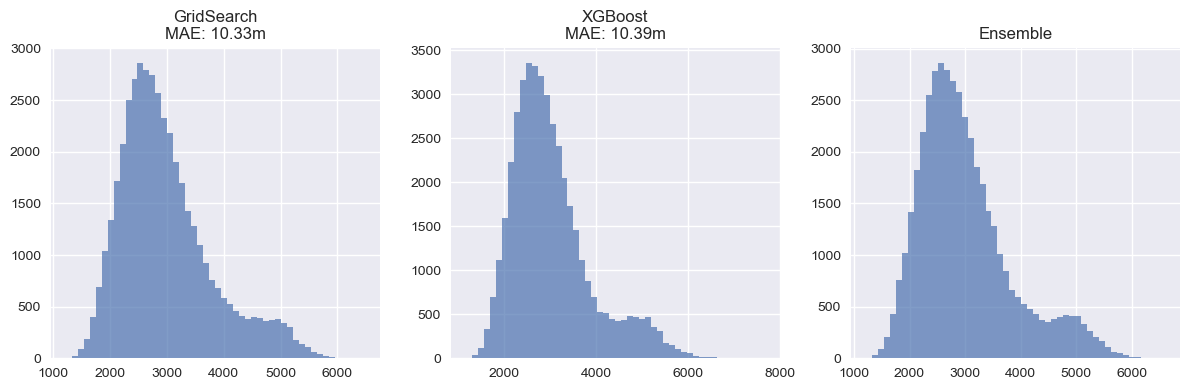


Ensemble predictions saved to 'submission_ensemble.csv'


In [33]:
# Ensemble predictions
predictions_grid = grid_search.predict(X_real_scaled)
predictions_xgb = xgb_model.predict(xgb.DMatrix(X_real_scaled))
predictions_ensemble = (predictions_grid + predictions_xgb) / 2

# Save ensemble predictions
submission_ensemble = pd.DataFrame({
    'delivery_duration': predictions_ensemble.astype(int)
})
submission_ensemble.to_csv('submission_ensemble.csv', index=False)

# Compare distributions
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.hist(predictions_grid, bins=50, alpha=0.7)
plt.title(f'GridSearch\nMAE: 10.33m')

plt.subplot(132)
plt.hist(predictions_xgb, bins=50, alpha=0.7)
plt.title(f'XGBoost\nMAE: 10.39m')

plt.subplot(133)
plt.hist(predictions_ensemble, bins=50, alpha=0.7)
plt.title('Ensemble')

plt.tight_layout()
plt.show()

print("\nEnsemble predictions saved to 'submission_ensemble.csv'")

In [34]:
# Calculate ensemble predictions on test set
test_pred_grid = grid_search.predict(X_test_scaled)
test_pred_xgb = xgb_model.predict(xgb.DMatrix(X_test_scaled))
test_pred_ensemble = (test_pred_grid + test_pred_xgb) / 2

# Calculate metrics
ensemble_rmse = root_mean_squared_error(y_test, test_pred_ensemble)
ensemble_mae = mean_absolute_error(y_test, test_pred_ensemble)

print(f"Ensemble Performance on Test Set:")
print(f"RMSE: {ensemble_rmse:.2f} seconds ({ensemble_rmse/60:.2f} minutes)")
print(f"MAE: {ensemble_mae:.2f} seconds ({ensemble_mae/60:.2f} minutes)")

Ensemble Performance on Test Set:
RMSE: 846.45 seconds (14.11 minutes)
MAE: 619.48 seconds (10.32 minutes)


In [35]:
# Final submission using GridSearch (our best model)
predictions = grid_search.predict(X_real_scaled)

# Save in required format
submission = pd.DataFrame({
    'delivery_duration': predictions.astype(int)
})
submission.to_csv('submission.csv', index=False)

In [36]:
pd.read_csv('submission.csv')

,delivery_duration
0,2947
1,2876
2,2936
3,2304
4,2456
...,...
43472,4380
43473,2034
43474,3751
43475,4223
